In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


%matplotlib inline

warnings.filterwarnings('ignore')

# WaKIDS

Data source is for incoming K's - from their [site](http://www.k12.wa.us/WaKIDS/About/default.aspx):

> WaKIDS provides a snapshot of where Washington’s kindergartners are in their development early in the school year. These data help inform state and district-level decisions about education policy and investments, and classroom decisions about individualized learning.

In [2]:
df = pd.read_csv('http://reportcard.ospi.k12.wa.us/Reports/2018/9_3_WaKIDS%20Scores%20by%20School.txt', sep='\t')

In [3]:
df.tail(5)

,ESDOrganizationName,DistrictCode,DistrictName,SchoolCode,SchoolName,subgroup,SocialEmotionalBirthtoTwoYearOlds,SocialEmotionalTwoYearOlds,SocialEmotional3YearOlds,SocialEmotional4YearOlds,...,CognitiveMet,LiteracyMet,MathMet,NumberMet0Domains,NumberMet1Domain,NumberMet2Domains,NumberMet3Domains,NumberMet4Domains,NumberMet5Domains,NumberMet6Domains
12842,Puget Sound Educational Service District 121,27417,Fife School District,2878,Discovery Primary School,Male,2.0,5.0,26.0,48.0,...,119.0,105.0,90.0,12.0,11.0,9.0,11.0,17.0,27.0,68.0
12843,Puget Sound Educational Service District 121,27417,Fife School District,2878,Discovery Primary School,Native Hawaiian / Other Pacific Islander,0.0,0.0,2.0,8.0,...,19.0,12.0,7.0,0.0,0.0,2.0,6.0,3.0,7.0,4.0
12844,Puget Sound Educational Service District 121,27417,Fife School District,2878,Discovery Primary School,Special Education,3.0,3.0,8.0,6.0,...,5.0,8.0,4.0,6.0,3.0,4.0,3.0,2.0,2.0,0.0
12845,Puget Sound Educational Service District 121,27417,Fife School District,2878,Discovery Primary School,Two or More Races,0.0,1.0,6.0,14.0,...,46.0,44.0,33.0,2.0,2.0,2.0,4.0,8.0,7.0,29.0
12846,Puget Sound Educational Service District 121,27417,Fife School District,2878,Discovery Primary School,White,1.0,3.0,12.0,38.0,...,101.0,89.0,85.0,6.0,7.0,3.0,3.0,15.0,20.0,68.0


In [4]:
df.shape

(12847, 55)

In [5]:
df.columns

Index(['ESDOrganizationName', 'DistrictCode', 'DistrictName', 'SchoolCode',
       'SchoolName', 'subgroup', 'SocialEmotionalBirthtoTwoYearOlds',
       'SocialEmotionalTwoYearOlds', 'SocialEmotional3YearOlds',
       'SocialEmotional4YearOlds', 'SocialEmotional5YearOlds',
       'SocialEmotionalTotal', 'PhysicalBirthtoTwoYearOlds',
       'PhysicalTwoYearOlds', 'Physical3YearOlds', 'Physical4YearOlds',
       'Physical5YearOlds', 'PhysicalTotal', 'LanguageBirthtoTwoYearOlds',
       'LanguageTwoYearOlds', 'Language3YearOlds', 'Language4YearOlds',
       'Language5YearOlds', 'LanguageTotal', 'CognitiveBirthtoTwoYearOlds',
       'CognitiveTwoYearOlds', 'Cognitive3YearOlds', 'Cognitive4YearOlds',
       'Cognitive5YearOlds', 'CognitiveTotal', 'LiteracyBirthtoTwoYearOlds',
       'LiteracyTwoYearOlds', 'Literacy3YearOlds', 'Literacy4YearOlds',
       'Literacy5YearOlds', 'LiteracyTotal', 'MathBirthtoTwoYearOlds',
       'MathTwoYearOlds', 'Math3YearOlds', 'Math4YearOlds', 'Math5YearOlds'

In [6]:
# Let's look at % meeting math and language
df["PctMathMet"] = np.round(df["MathMet"] / df["MathTotal"] * 100, 2)
df["PctLangMet"] = np.round(df["LanguageMet"] / df["LanguageTotal"] * 100, 2)
df["PctPhysMet"] = np.round(df["PhysicalMet"] / df["PhysicalTotal"] * 100, 2)
df["PctCogMet"] = np.round(df["CognitiveMet"] / df["CognitiveTotal"] * 100, 2)
df["PctLitMet"] = np.round(df["LiteracyMet"] / df["LiteracyTotal"] * 100, 2)
df["PctSelMet"] = np.round(df["SocialEmotionalMet"] / df["SocialEmotionalTotal"] * 100, 2)

In [7]:
# What are demographics?
df['subgroup'].value_counts()

All                                         1152
Male                                        1142
Female                                      1141
White                                       1128
Low Income                                  1112
Hispanic / Latino of any race(s)            1089
Special Education                           1082
Two or More Races                            991
Limited English                              973
Asian                                        744
Homeless                                     678
Black / African American                     653
American Indian / Alaskan Native             356
Native Hawaiian / Other Pacific Islander     355
Migrant                                      216
Not Specified                                 35
Name: subgroup, dtype: int64

In [8]:
# groups of demographics
allg = ['All']
gender = ['Male','Female']
income = ['Low Income']
race = ['American Indian / Alaskan Native', 'Black / African American', 
        'Hisplanic / Latino of any race(s)', 'White', 'Asian', 
        'Native Hawaiian / Other Pacific Islander', 'Two or More Races']
special_ed = ['Special Education']
homeless = ['Homeless']
migrant = ['Migrant']


In [9]:
# Look at math readiness in all groups
df.loc[df['subgroup'].isin(allg)][["PctMathMet"]].dropna().describe()

,PctMathMet
count,1098.000000
mean,66.630665
std,20.131312
min,0.000000
25%,53.352500
50%,68.455000
75%,82.482500
max,100.000000


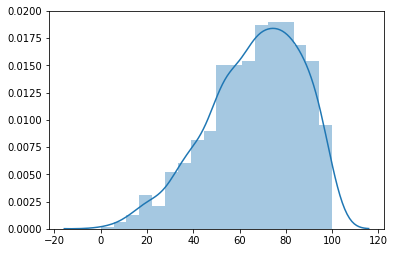

In [10]:
# Visual representation
sns.distplot(df.loc[df['subgroup'].isin(allg)][["PctMathMet"]].dropna())

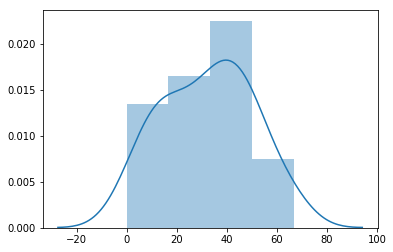

In [11]:
# Look at distribution for other groups - migrants
sns.distplot(df.loc[df['subgroup'].isin(migrant)][["PctMathMet"]].dropna())

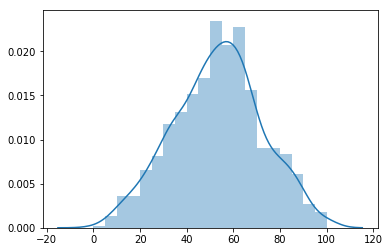

In [12]:
# Look at distribution for other groups - low income
sns.distplot(df.loc[df['subgroup'].isin(income)][["PctMathMet"]].dropna())

In [13]:
# What does top 10% for low income look like?
df.loc[df['subgroup'].isin(income)][["PctMathMet"]].dropna().quantile(0.9)

PctMathMet    78.76
Name: 0.9, dtype: float64

In [14]:
df.loc[(df['subgroup'].isin(income)) & (df['PctMathMet']>=78.759398)][
    ['DistrictName', 'SchoolName', 'PctMathMet']].sort_values(by='PctMathMet', ascending=False)

,DistrictName,SchoolName,PctMathMet
23,SOAR Academy Charter District,SOAR Academy Public Charter School,100.00
1398,Spokane School District,Bryant Center,100.00
7351,Cape Flattery School District,Clallam Bay High & Elementary,100.00
4971,Mansfield School District,Mansfield Elem and High School,100.00
2080,Northport School District,Northport Elementary School,100.00
2044,Loon Lake School District,Loon Lake Elementary School,100.00
2924,Vancouver School District,Salmon Creek Elementary,100.00
170,Lake Quinault School District,Lake Quinault Elementary,100.00
8227,Seattle Public Schools,Laurelhurst Elementary School,93.75
11543,Tacoma School District,Washington Elementary,93.33


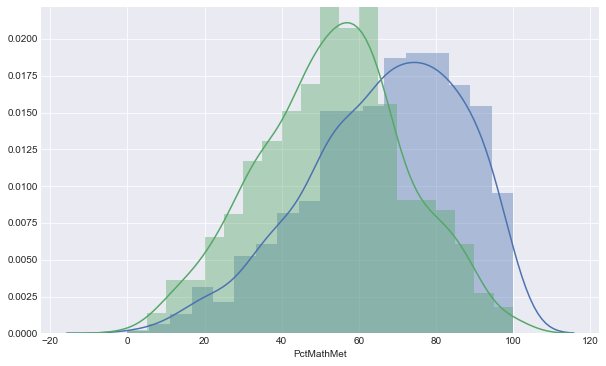

In [15]:
# Low income vs all students - how ready are they in math?
plt.figure(figsize=(10,6))


sns.set_style('darkgrid')
sns.set_palette("deep")

sns.distplot(df[df['subgroup'].isin(allg)]["PctMathMet"].dropna(), label="all")
sns.distplot(df[df['subgroup'].isin(income)]["PctMathMet"].dropna(), label="low income")


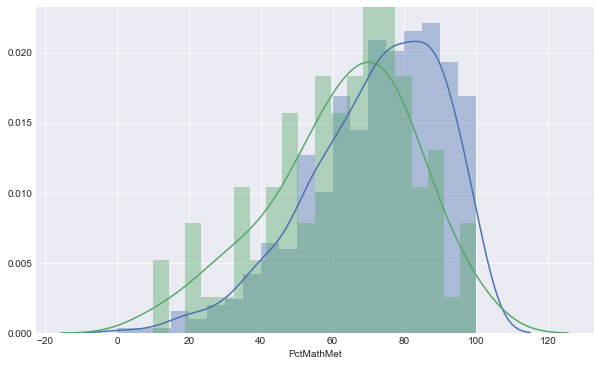

In [16]:
# Same thing as but white vs black kids
plt.figure(figsize=(10,6))


sns.distplot(df[df['subgroup'].isin(['White'])]["PctMathMet"].dropna(), label="White", bins=20)
sns.distplot(df[df['subgroup'].isin(['Black / African American'])]["PctMathMet"].dropna(), label="Black", bins=20)
#sns.kdeplot(df[df['subgroup'].isin(['Asian'])]["PctMathMet"].dropna(), label="Asian")


# this isn't that HUGE of a gap -- how much does the gap widen as kids get to 3rd grade, 5th grade, beyond...


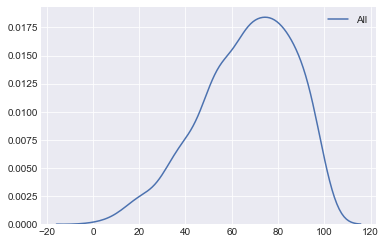

In [17]:
sns.kdeplot(df[df['subgroup'].isin(allg)]["PctMathMet"].dropna(), label="All")



In [18]:
df.loc[df['subgroup'].isin(gender)][
    ['DistrictName', 'SchoolName', 'subgroup', 
     'MathMet', 'MathTotal',"PctMathMet"]].sort_values(by='PctMathMet', ascending=False)

,DistrictName,SchoolName,subgroup,MathMet,MathTotal,PctMathMet
8217,Seattle Public Schools,Bryant Elementary School,Male,44.0,44,100.0
4756,Entiat School District,Paul Rumburg Elementary,Male,12.0,12,100.0
882,Olympia School District,Pioneer Elementary School,Female,43.0,43,100.0
6568,Monroe School District,Sky Valley Education Center,Female,17.0,17,100.0
250,Morton School District,Morton Elementary School,Female,10.0,10,100.0
2045,Loon Lake School District,Loon Lake Elementary School,Male,10.0,10,100.0
8557,Seattle Public Schools,Thornton Creek Elementary School,Male,54.0,54,100.0
8553,Seattle Public Schools,Thornton Creek Elementary School,Female,49.0,49,100.0
10807,Kent School District,Ridgewood Elementary School,Female,12.0,12,100.0
11129,Northshore School District,Sunrise Elementary,Female,22.0,22,100.0


In [19]:

df.loc[df['subgroup'].isin(income)][
    ['DistrictName', 'SchoolName', 'subgroup', 
     'MathMet', 'MathTotal',"PctMathMet"]].sort_values(by='PctMathMet', ascending=False)

,DistrictName,SchoolName,subgroup,MathMet,MathTotal,PctMathMet
23,SOAR Academy Charter District,SOAR Academy Public Charter School,Low Income,25.0,25,100.00
170,Lake Quinault School District,Lake Quinault Elementary,Low Income,16.0,16,100.00
2044,Loon Lake School District,Loon Lake Elementary School,Low Income,11.0,11,100.00
2080,Northport School District,Northport Elementary School,Low Income,11.0,11,100.00
1398,Spokane School District,Bryant Center,Low Income,10.0,10,100.00
7351,Cape Flattery School District,Clallam Bay High & Elementary,Low Income,10.0,10,100.00
2924,Vancouver School District,Salmon Creek Elementary,Low Income,14.0,14,100.00
4971,Mansfield School District,Mansfield Elem and High School,Low Income,10.0,10,100.00
8227,Seattle Public Schools,Laurelhurst Elementary School,Low Income,15.0,16,93.75
11543,Tacoma School District,Washington Elementary,Low Income,14.0,15,93.33


In [20]:

df.loc[df['subgroup'].isin(income)][
    ['DistrictName', 'SchoolName', 'subgroup', 
     'MathMet', 'MathTotal',"PctMathMet"]].quantile(0.5)

MathMet       16.00
MathTotal     26.00
PctMathMet    54.17
Name: 0.5, dtype: float64

In [21]:
df['subgroup'].value_counts()

All                                         1152
Male                                        1142
Female                                      1141
White                                       1128
Low Income                                  1112
Hispanic / Latino of any race(s)            1089
Special Education                           1082
Two or More Races                            991
Limited English                              973
Asian                                        744
Homeless                                     678
Black / African American                     653
American Indian / Alaskan Native             356
Native Hawaiian / Other Pacific Islander     355
Migrant                                      216
Not Specified                                 35
Name: subgroup, dtype: int64

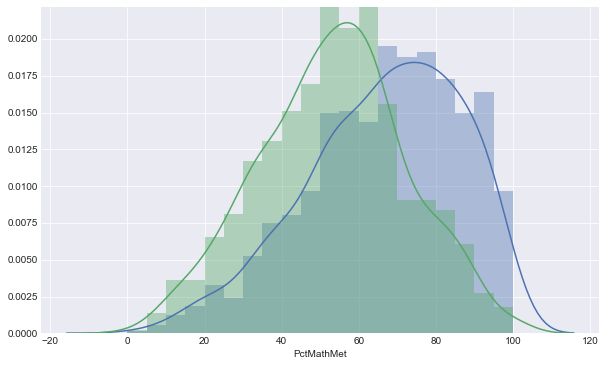

In [22]:
plt.figure(figsize=(10,6))


sns.distplot(df[df['subgroup'].isin(['All'])]["PctMathMet"].dropna(), label="All", bins=20)
sns.distplot(df[df['subgroup'].isin(['Low Income'])]["PctMathMet"].dropna(), label="Low Income", bins=20)



In [23]:
np.round(df[df['subgroup'].isin(['White'])]["PctMathMet"].dropna().mean(),2)

71.95

In [24]:
np.round(df[df['subgroup'].isin(['Black / African American'])]["PctMathMet"].dropna().mean(),2)

63.01

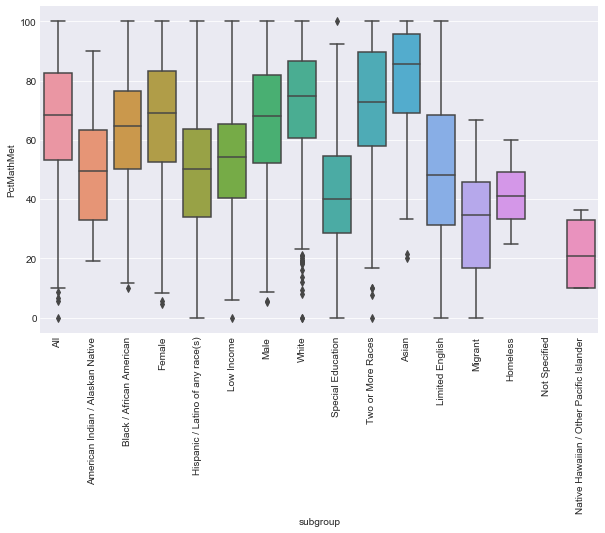

In [25]:
plt.figure(figsize=(10,6))


ax = sns.boxplot(data=df, y="PctMathMet", x="subgroup")
o_ = plt.setp(ax.get_xticklabels(), rotation=90)


In [26]:
df0 = df[["SchoolCode","subgroup","PctMathMet","PctLangMet","PctPhysMet","PctCogMet",
    "PctLitMet","PctSelMet"]]

In [27]:
df0[df0["subgroup"].isin(allg)].describe()

,SchoolCode,PctMathMet,PctLangMet,PctPhysMet,PctCogMet,PctLitMet,PctSelMet
count,1152.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1099.000000
mean,3382.951389,66.630665,72.116548,82.488015,71.946302,77.699936,76.860810
std,888.550922,20.131312,17.161609,15.554740,18.897439,17.068856,15.269316
min,1579.000000,0.000000,4.230000,0.000000,0.000000,4.350000,0.000000
25%,2710.250000,53.352500,62.070000,75.480000,60.825000,68.180000,68.750000
50%,3263.000000,68.455000,74.385000,86.540000,74.925000,81.530000,79.660000
75%,4122.500000,82.482500,85.275000,93.580000,86.715000,90.710000,87.790000
max,5507.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [28]:
df0[df0["subgroup"].isin(income)].describe()

,SchoolCode,PctMathMet,PctLangMet,PctPhysMet,PctCogMet,PctLitMet,PctSelMet
count,1112.000000,886.000000,886.000000,886.000000,886.000000,884.000000,885.000000
mean,3383.051259,53.232551,62.581874,77.686456,62.600869,66.237104,70.348000
std,878.070688,19.055079,18.603852,17.298892,20.381067,18.465947,17.026095
min,1579.000000,0.000000,3.280000,0.000000,0.000000,4.550000,8.570000
25%,2714.750000,40.297500,50.000000,67.672500,50.000000,54.840000,60.000000
50%,3263.000000,54.170000,63.485000,81.165000,64.000000,68.180000,72.730000
75%,4106.250000,65.432500,75.860000,90.910000,77.722500,80.000000,82.860000
max,5507.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [29]:
df_low = df0[df0["subgroup"].isin(income)]
df_low.tail(5)

,SchoolCode,subgroup,PctMathMet,PctLangMet,PctPhysMet,PctCogMet,PctLitMet,PctSelMet
12795,2190,Low Income,43.48,39.13,86.96,52.17,69.57,52.17
12803,4170,Low Income,NaN,NaN,NaN,NaN,NaN,NaN
12815,4309,Low Income,70.45,59.09,86.36,70.45,77.27,59.09
12828,4471,Low Income,75.00,58.33,66.67,83.33,66.67,75.00
12841,2878,Low Income,44.26,65.57,86.07,72.95,55.74,84.43


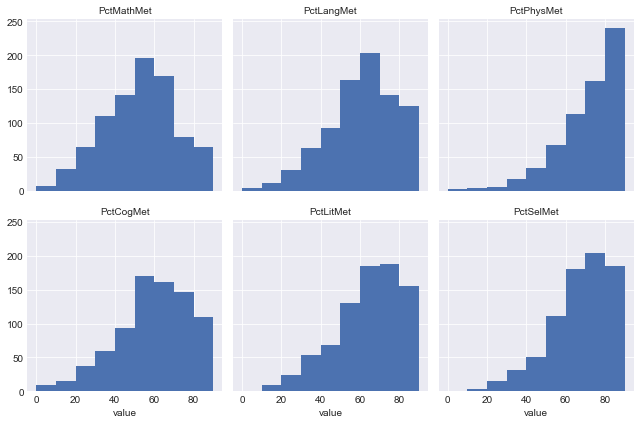

In [30]:
df_low_melt = pd.melt(df_low,id_vars=['SchoolCode'],value_vars=['PctMathMet','PctLangMet','PctPhysMet','PctCogMet','PctLitMet','PctSelMet'])
g = sns.FacetGrid(data=df_low_melt,col='variable', col_wrap=3)
g.map(plt.hist, "value", bins=np.arange(0,100,10))
g.set_titles("{col_name}")


In [31]:
df_all = df0[df0["subgroup"].isin(allg)]
df_all.tail(5)

,SchoolCode,subgroup,PctMathMet,PctLangMet,PctPhysMet,PctCogMet,PctLitMet,PctSelMet
12788,2190,All,67.65,52.94,85.29,72.06,80.88,64.71
12800,4170,All,81.40,100.00,97.67,65.12,83.72,100.00
12808,4309,All,77.27,68.18,88.64,75.00,84.09,65.91
12821,4471,All,88.57,64.29,71.43,85.71,88.57,91.43
12833,2878,All,58.59,74.41,87.54,80.47,70.03,85.86


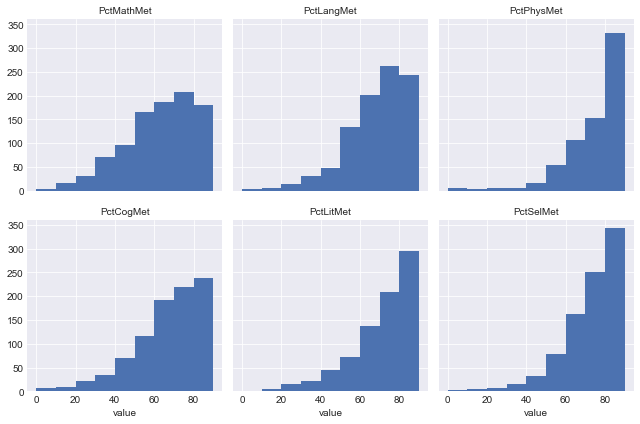

In [32]:
df_all_melt = pd.melt(df_all,id_vars=['SchoolCode','subgroup'],value_vars=['PctMathMet','PctLangMet','PctPhysMet','PctCogMet','PctLitMet','PctSelMet'])
g = sns.FacetGrid(data=df_all_melt, col='variable', col_wrap=3)
g.map(plt.hist, "value", bins=np.arange(0,100,10))
g.set_titles("{col_name}")



## Statewide Results - 2018

In [33]:

df = pd.read_csv('http://reportcard.ospi.k12.wa.us/Reports/2018/9_1_WaKIDS%20Scores%20by%20State.txt', sep='\t')

In [34]:
df.tail(5)

,StateOrganizationName,subgroup,SocialEmotionalBirthtoTwoYearOlds,SocialEmotionalTwoYearOlds,SocialEmotional3YearOlds,SocialEmotional4YearOlds,SocialEmotional5YearOlds,SocialEmotionalTotal,PhysicalBirthtoTwoYearOlds,PhysicalTwoYearOlds,...,CognitiveMet,LiteracyMet,MathMet,NumberMet0Domains,NumberMet1Domain,NumberMet2Domains,NumberMet3Domains,NumberMet4Domains,NumberMet5Domains,NumberMet6Domains
11,State Total,Native Hawaiian / Other Pacific Islander,21,26,171,314,332,864,3,9,...,520,503,382,68,86,102,103,108,141,249
12,State Total,Not Specified,1,1,7,16,15,40,0,1,...,25,33,24,1,2,1,8,4,7,15
13,State Total,Special Education,751,1039,2028,1966,1465,7249,262,412,...,3140,4184,3207,1453,979,882,796,821,898,1322
14,State Total,Two or More Races,141,284,1224,2354,3221,7224,43,102,...,5327,5842,5111,372,348,470,519,703,1135,3654
15,State Total,White,636,1571,6649,13410,19134,41400,194,509,...,31440,34322,30045,1841,1884,2300,2910,3981,6605,21709


In [35]:
df.columns

Index(['StateOrganizationName', 'subgroup',
       'SocialEmotionalBirthtoTwoYearOlds', 'SocialEmotionalTwoYearOlds',
       'SocialEmotional3YearOlds', 'SocialEmotional4YearOlds',
       'SocialEmotional5YearOlds', 'SocialEmotionalTotal',
       'PhysicalBirthtoTwoYearOlds', 'PhysicalTwoYearOlds',
       'Physical3YearOlds', 'Physical4YearOlds', 'Physical5YearOlds',
       'PhysicalTotal', 'LanguageBirthtoTwoYearOlds', 'LanguageTwoYearOlds',
       'Language3YearOlds', 'Language4YearOlds', 'Language5YearOlds',
       'LanguageTotal', 'CognitiveBirthtoTwoYearOlds', 'CognitiveTwoYearOlds',
       'Cognitive3YearOlds', 'Cognitive4YearOlds', 'Cognitive5YearOlds',
       'CognitiveTotal', 'LiteracyBirthtoTwoYearOlds', 'LiteracyTwoYearOlds',
       'Literacy3YearOlds', 'Literacy4YearOlds', 'Literacy5YearOlds',
       'LiteracyTotal', 'MathBirthtoTwoYearOlds', 'MathTwoYearOlds',
       'Math3YearOlds', 'Math4YearOlds', 'Math5YearOlds', 'MathTotal',
       'SocialEmotionalMet', 'PhysicalMet',

In [36]:
df["PctMathMet"] = np.round(df["MathMet"] / df["MathTotal"] * 100, 2)

In [37]:
df[df['subgroup'].isin(race)][['subgroup','PctMathMet']]

,subgroup,PctMathMet
1,American Indian / Alaskan Native,49.90
2,Asian,80.86
3,Black / African American,63.04
11,Native Hawaiian / Other Pacific Islander,44.47
14,Two or More Races,70.88
15,White,72.70


### How does this work in 3rd to 5th grade ...?


In [38]:
dfmap = pd.read_csv('http://reportcard.ospi.k12.wa.us/Reports/2018/2_01_AIM-WCAS-SBA%20Assessments%20State%20(with%20suppression%20-%20new%20format).txt', sep='\t') 

In [39]:
dfmap.tail(5)

,schoolYear,testAdministration,Subject,GradeLevel,StudentGroup,suppressed,suppressReason,countTotalTested_and_NotTested,countMetStandardIncludingPP,PercentMetStandardIncludingPP,...,countLevel2,PercentLevel2,countLevel1,PercentLevel1,countNoScore,percentNoScore,countNotMet,PercentNotMet,countExcusedAbsence,countExempted
578,2017-2018,WCAS,Science,11th,Non Low Income,n,NaN,47882,17444.0,36.4,...,6907.0,14.4,6141.0,12.8,17390.0,36.3,30438.0,63.5,NaN,625.0
579,2017-2018,WCAS,Science,11th,Asian,n,NaN,6589,2637.0,40.0,...,942.0,14.2,772.0,11.7,2238.0,33.9,3952.0,59.9,NaN,131.0
580,2017-2018,WCAS,Science,11th,Native Hawaiian / Other Pacific Islander,n,NaN,857,126.0,14.7,...,187.0,21.8,283.0,33.0,261.0,30.4,731.0,85.2,NaN,34.0
581,2017-2018,WCAS,Science,11th,Section 504,n,NaN,4753,1544.0,32.4,...,725.0,15.2,666.0,14.0,1818.0,38.2,3209.0,67.5,NaN,44.0
582,2017-2018,WCAS,Science,11th,Two or More Races,n,NaN,5384,1754.0,32.5,...,888.0,16.4,911.0,16.9,1831.0,34.0,3630.0,67.4,NaN,83.0


In [40]:
dfmap.columns

Index(['schoolYear', 'testAdministration', 'Subject', 'GradeLevel',
       'StudentGroup', 'suppressed', 'suppressReason',
       'countTotalTested_and_NotTested', 'countMetStandardIncludingPP',
       'PercentMetStandardIncludingPP', 'countMetStandardWithoutPP',
       'PercentMetStandardWithoutPP', 'percentMeetingStandardExcludingNoScore',
       'countLevel4', 'PercentLevel4', 'countLevel3', 'PercentLevel3',
       'countLevel2', 'PercentLevel2', 'countLevel1', 'PercentLevel1',
       'countNoScore', 'percentNoScore', 'countNotMet', 'PercentNotMet',
       'countExcusedAbsence', 'countExempted'],
      dtype='object')

In [71]:
# $HACKHACK
def meeting_standards_by_group(grade, subject, testAdministration, studentGroup):
    return dfmap[(dfmap['GradeLevel']==grade) & 
          (dfmap['Subject']==subject) &
          (dfmap['testAdministration']==testAdministration) &
          (dfmap['StudentGroup'].isin(studentGroup))][
        ['StudentGroup','percentMeetingStandardExcludingNoScore']]   

In [72]:
meeting_standards_by_group('3rd','MATH','SBA',race)

,StudentGroup,percentMeetingStandardExcludingNoScore
129,American Indian / Alaskan Native,30.6
130,Black / African American,40.7
132,White,65.9
140,Asian,79.1
141,Native Hawaiian / Other Pacific Islander,37.9
143,Two or More Races,60.3


In [73]:
meeting_standards_by_group('5th','MATH','SBA',race)

,StudentGroup,percentMeetingStandardExcludingNoScore
165,American Indian / Alaskan Native,22.0
166,Black / African American,27.6
168,White,56.7
176,Asian,74.2
177,Native Hawaiian / Other Pacific Islander,27.7
179,Two or More Races,51.8


In [74]:
meeting_standards_by_group('3rd','ELA','SBA',race)

,StudentGroup,percentMeetingStandardExcludingNoScore
3,American Indian / Alaskan Native,26.7
4,Black / African American,40.9
6,White,64.6
14,Asian,74.0
15,Native Hawaiian / Other Pacific Islander,33.6
17,Two or More Races,60.1


In [76]:
meeting_standards_by_group('5th','ELA','SBA',race)

,StudentGroup,percentMeetingStandardExcludingNoScore
39,American Indian / Alaskan Native,31.3
40,Black / African American,40.8
42,White,68.4
50,Asian,78.9
51,Native Hawaiian / Other Pacific Islander,39.2
53,Two or More Races,63.9


In [78]:
meeting_standards_by_group('3rd','ELA','SBA',income)

,StudentGroup,percentMeetingStandardExcludingNoScore
11,Low Income,39.8


In [79]:
meeting_standards_by_group('5th','ELA','SBA',income)

,StudentGroup,percentMeetingStandardExcludingNoScore
47,Low Income,43.3


In [80]:
meeting_standards_by_group('3rd','MATH','SBA',income)

,StudentGroup,percentMeetingStandardExcludingNoScore
137,Low Income,42.6


In [82]:
meeting_standards_by_group('5th','MATH','SBA',income)

,StudentGroup,percentMeetingStandardExcludingNoScore
173,Low Income,32.4
